<a href="https://colab.research.google.com/github/jeffyjohny7/ict/blob/main/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
stud= pd.read_csv("/content/Students_Performance.csv")
print(stud.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [3]:

stud.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


1) Find out how many males and females participated in the test ?

In [4]:
stud['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

2) What do you think about the students' parental level of education

In [5]:

stud['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

[Text(0, 0, 'some high school'),
 Text(1, 0, 'high school'),
 Text(2, 0, 'some college'),
 Text(3, 0, "associate's degree"),
 Text(4, 0, "bachelor's degree"),
 Text(5, 0, "master's degree")]

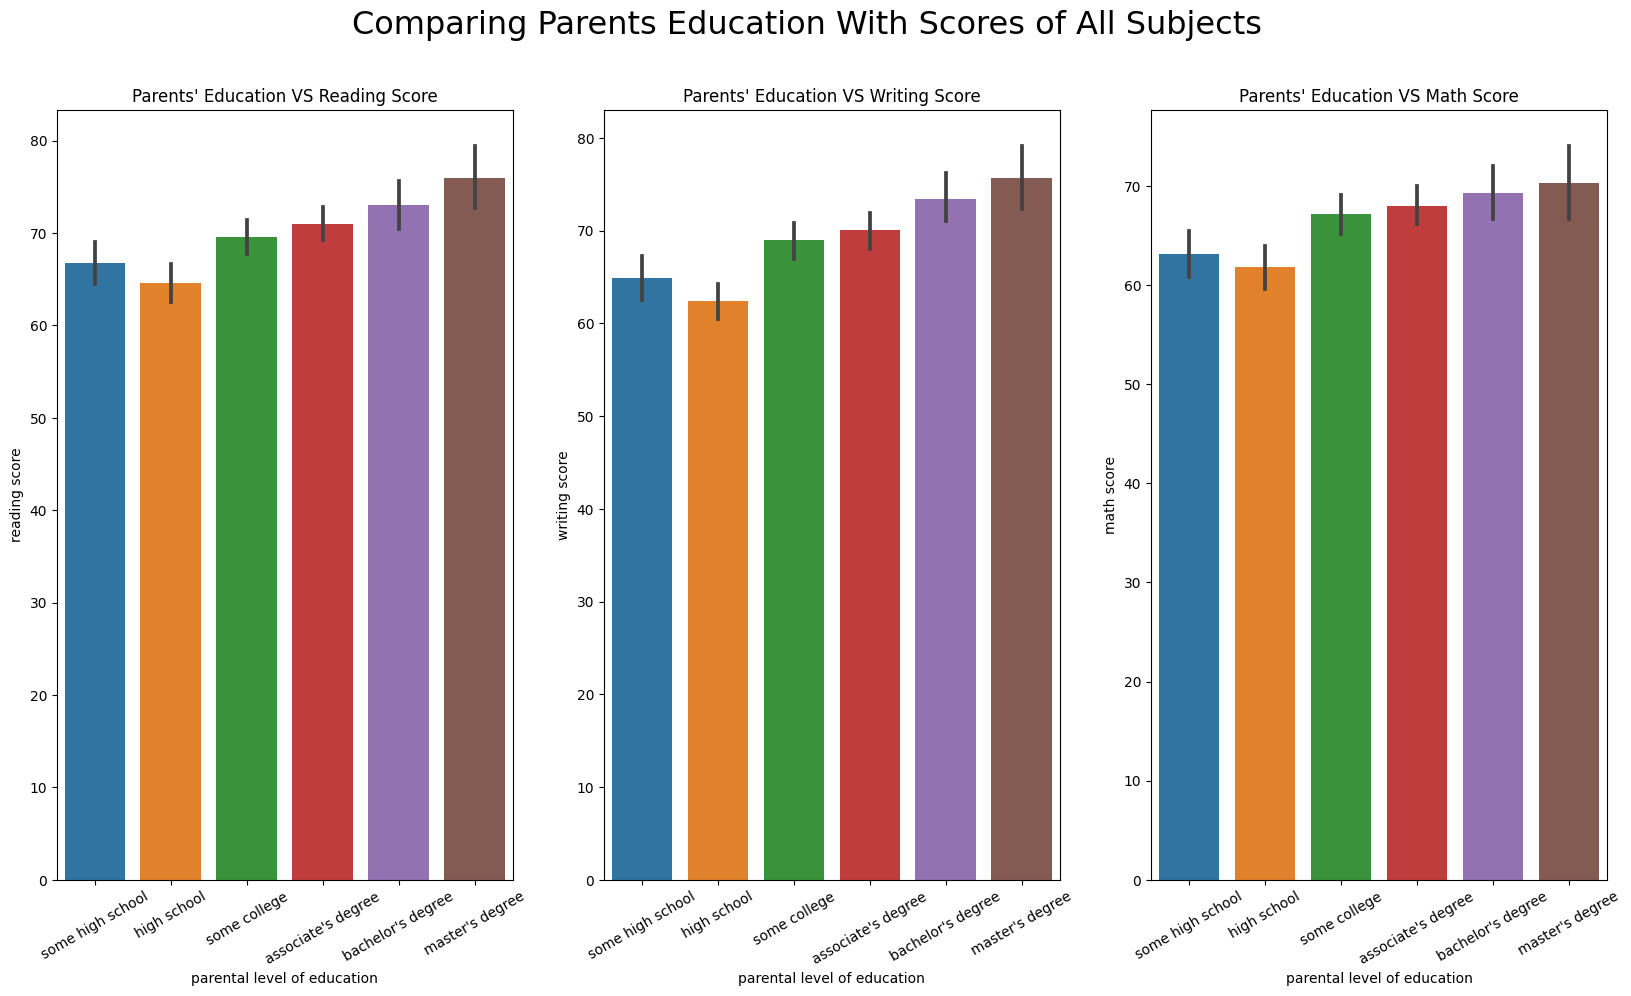

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Comparing Parents Education With Scores of All Subjects', fontsize=23)

sns.barplot(data=stud,x='parental level of education', y='reading score', ax=ax1)
ax1.title.set_text('Parents\' Education VS Reading Score')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)

sns.barplot(data=stud,x='parental level of education', y='writing score', ax=ax2)
ax2.title.set_text('Parents\' Education VS Writing Score')
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=30)

sns.barplot(data=stud,x='parental level of education', y='math score', ax=ax3)
ax3.title.set_text('Parents\' Education VS Math Score')
ax3.set_xticklabels(ax1.get_xticklabels(), rotation=30)

3) Who scores the most on average for math, reading and writing based on***

i) Gender ii) Test Prepration Course ?



In [7]:
stud['score average'] = (stud[['math score','reading score','writing score']]).mean(axis=1)
stud.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score average
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000


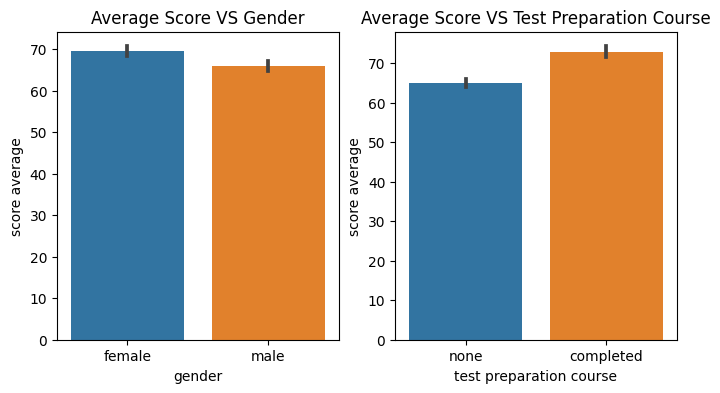

In [8]:
fig, (ax4, ax5) = plt.subplots(1, 2, figsize=(8, 4))

sns.barplot(y=stud['score average'], x=stud['gender'], ax=ax4)
ax4.title.set_text('Average Score VS Gender')

sns.barplot(y=stud['score average'], x=stud['test preparation course'], ax=ax5)
ax5.title.set_text('Average Score VS Test Preparation Course')

4) What do you think about the scoring variation for math, reading and writing based on*

i) Gender ii) Test Prepration Course ?

In [9]:
stud['score variation'] = stud[['math score','writing score','reading score']].std(axis=1)
stud.head(3)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score average,score variation
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000,8.544004
1,female,group B,high school,free/reduced,none,8,24,23,18.333333,8.962886
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000,7.211103


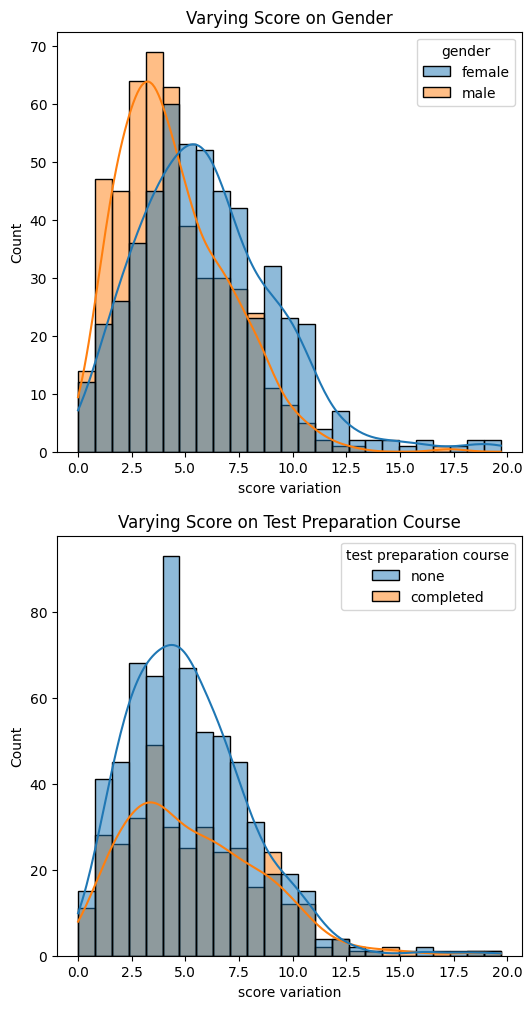

In [11]:
fig, (ax6, ax7) = plt.subplots(2, 1, figsize=(6, 12))

sns.histplot(x=stud['score variation'],hue=stud['gender'], kde=True, ax=ax6)
ax6.title.set_text('Varying Score on Gender')

sns.histplot(x=stud['score variation'],hue=stud['test preparation course'], kde=True, ax=ax7)
ax7.title.set_text('Varying Score on Test Preparation Course')

*5. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this

In [12]:
cut_off_score = np.percentile(stud['math score'].values,75)


In [13]:
eligible_students = stud[stud['math score'] >= cut_off_score]
eligible_students.sort_values('math score',ascending=False)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score average,score variation
999,male,group E,bachelor's degree,standard,completed,100,100,100,100.000000,0.000000
998,male,group E,associate's degree,free/reduced,completed,100,100,93,97.666667,4.041452
997,male,group D,some college,standard,completed,100,97,99,98.666667,1.527525
996,male,group A,some college,standard,completed,100,96,86,94.000000,7.211103
517,female,group E,associate's degree,standard,none,100,100,100,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
854,male,group D,some high school,standard,completed,77,68,69,71.333333,4.932883
855,male,group E,associate's degree,free/reduced,completed,77,69,68,71.333333,4.932883
856,male,group E,some high school,standard,completed,77,76,77,76.666667,0.577350
415,female,group B,master's degree,free/reduced,completed,77,97,94,89.333333,10.785793
